# Libraries used in this notebook

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing data set from kaggle

currently using downloaded version until import from website works

In [93]:
file_path = r'/workspaces/ACT-coursework-2/star_classification.csv'
df_sdss = pd.read_csv(file_path)
df_sdss.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# ML Classifier

We will be using a Random Forest classifier to classify wether a data point is a Star, Galaxy or quasar 'QSO'. A Random Forest is a collection of decision tress which all run independatly from one another and tehn compare there final results to

In [ ]:
df_sdss['class'] = LabelEncoder().fit_transform(df_sdss['class'])
X = df_sdss.drop(['class'], axis = 1) #uses all columns except class column
y = df_sdss['class'] # uses only class column
X_train_sdss, X_test_sdss, y_train_sdss, y_test_sdss = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [95]:
rf_class = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_class.fit(X_train_sdss, y_train_sdss)
y_pred = rf_class.predict(X_test_sdss)

accuracy = accuracy_score(y_test_sdss, y_pred)
mse = mean_squared_error(y_test_sdss, y_pred)
rmse = np.sqrt(mse)
print('Accuracy: ', accuracy*100,'%')
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Accuracy:  97.87666666666667 %
Mean Squared Error:  0.025833333333333333
Root Mean Squared Error:  0.16072751268321592


# Model parameters

In [96]:
rf_params = rf_class.get_params()
rf_params_df = pd.DataFrame([rf_params]).T
display(rf_params_df)

,0
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


# Feature importance for Random Forest

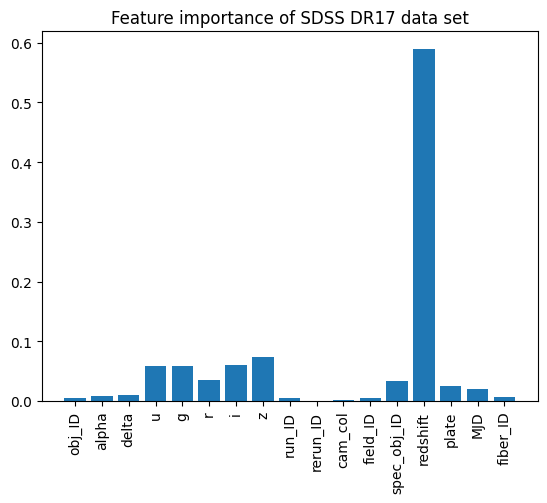

In [97]:
plt.title('Feature importance of SDSS DR17 data set')
plt.bar(rf_class.feature_names_in_, rf_class.feature_importances_)
plt.xticks(rotation=90)
plt.show()